<a href="https://colab.research.google.com/github/mraihanramadhan/Machine-Learning/blob/main/Final%20Test_Paper%202_Twitter%20Sentiment%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np #Untuk mengimport library yang digunakan
import pandas as pd #Untuk mengimport library yang digunakan yaitu pandas

import matplotlib.pyplot as plt #untuk melakukan visualisasi data
import seaborn as sns #untuk membuat grafik statistik
import re #untuk memeriksa apakah string berisi pola pencarian yang ditentukan
import nltk #sebuah library untuk mengimport natural language

import warnings #sebagai peringatan untuk developer of situations that aren't necessarily exceptions

In [ ]:
train = pd.read_csv('drive/MyDrive/Keggle/train_tweet.csv') #memasukan data train
test = pd.read_csv('drive/MyDrive/Keggle/test_tweets.csv') #memasukan data test

print(train.shape) #Mencetak train
print(test.shape) #mencetak test

(31962, 3)
(17197, 2)


In [ ]:
train.head() #untuk menguji dengan cepat apakah objek Anda memiliki tipe data yang tepat di dalamnya.

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
test.head() #untuk menguji dengan cepat apakah objek Anda memiliki tipe data yang tepat di dalamnya.

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [ ]:
train.isnull().any() #menghasilkan array boolean (True jika kolom memiliki nilai yang hilang, False jika tidak) terhadap train
test.isnull().any() #menghasilkan array boolean (True jika kolom memiliki nilai yang hilang, False jika tidak) terhadap test

id       False
tweet    False
dtype: bool

In [ ]:
#melihat komentar negatif dari set kereta
train[train['label'] == 0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [ ]:
#melihat komentar positif dari set kereta
train[train['label'] == 1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk fol...
77,78,1,"@user hey, white people: you can call people '..."
82,83,1,how the #altright uses &amp; insecurity to lu...
111,112,1,@user i'm not interested in a #linguistics tha...


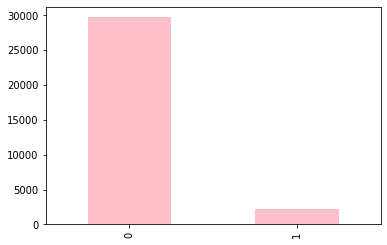

In [ ]:
#untuk train label dengan warna pink dan set ukuran 6, 4
train['label'].value_counts().plot.bar(color = 'pink', figsize = (6, 4))

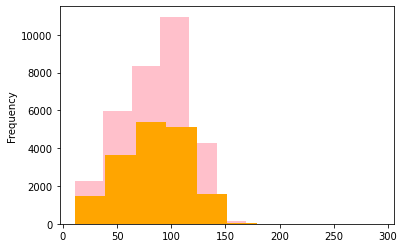

In [ ]:
#memeriksa distribusi tweet dalam data
length_train = train['tweet'].str.len().plot.hist(color = 'pink', figsize = (6, 4))
length_test = test['tweet'].str.len().plot.hist(color = 'orange', figsize = (6, 4))

In [ ]:
#menambahkan kolom untuk mewakili panjang tweet
train['len'] = train['tweet'].str.len()
test['len'] = test['tweet'].str.len()

train.head(10)

,id,label,tweet,len
0,1,0,@user when a father is dysfunctional and is s...,102
1,2,0,@user @user thanks for #lyft credit i can't us...,122
2,3,0,bihday your majesty,21
3,4,0,#model i love u take with u all the time in ...,86
4,5,0,factsguide: society now #motivation,39
5,6,0,[2/2] huge fan fare and big talking before the...,116
6,7,0,@user camping tomorrow @user @user @user @use...,74
7,8,0,the next school year is the year for exams.ð...,143
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,87
9,10,0,@user @user welcome here ! i'm it's so #gr...,50


In [ ]:
#menampilkan data train.groupby
train.groupby('label').describe()

id                                   ...   len                    
         count          mean          std   min  ...   25%   50%    75%    max
label                                            ...                          
0      29720.0  15974.454441  9223.783469   1.0  ...  62.0  88.0  107.0  274.0
1       2242.0  16074.896075  9267.955758  14.0  ...  69.0  96.0  111.0  152.0

[2 rows x 16 columns]

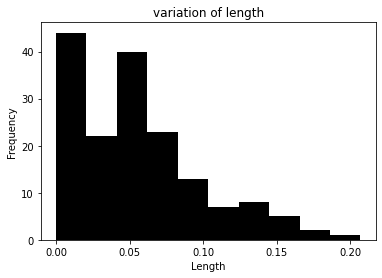

In [ ]:
#menampilkan grafik data variation of length
train.groupby('len').mean()['label'].plot.hist(color = 'black', figsize = (6, 4),)
plt.title('variation of length')
plt.xlabel('Length')
plt.show()

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

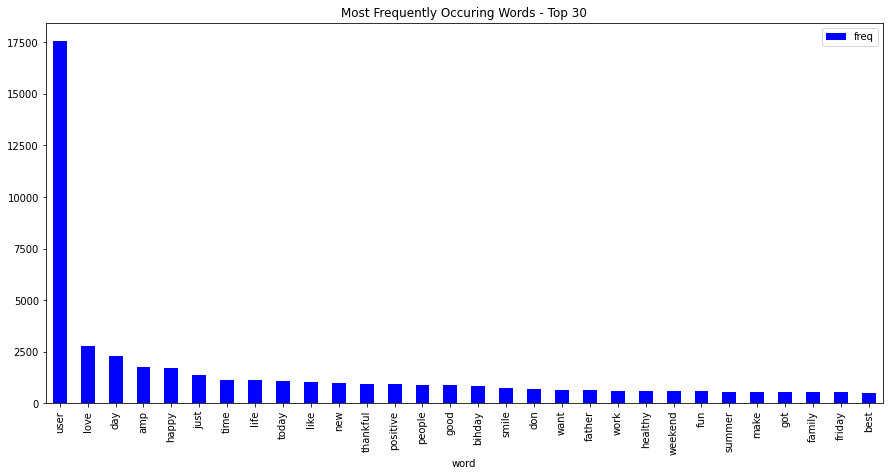

In [ ]:
#menampilkan grafik data Most Frequently Occuring Words - Top 3
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(train.tweet)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

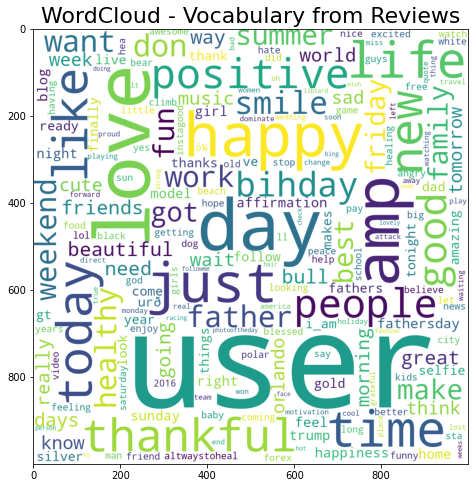

In [ ]:
#mem-plot data dari WordCloud - Vocabulary from Reviews dengan ukuran font 22
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)

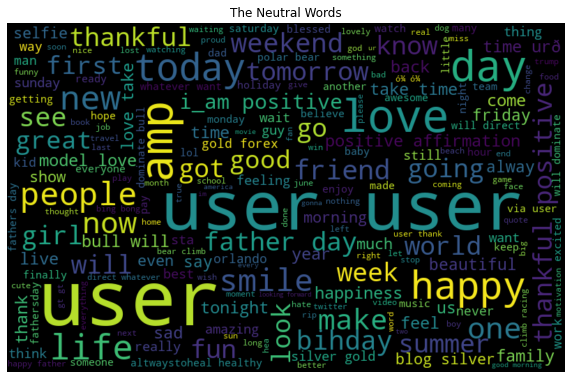

In [ ]:
#mem-plot data dari The Neutral Words
normal_words =' '.join([text for text in train['tweet'][train['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()

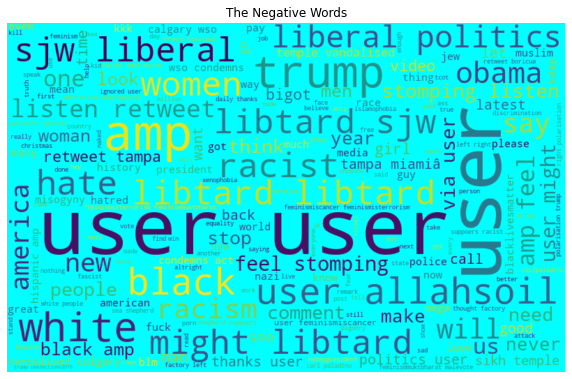

In [ ]:
#mem-plot dari data The Negative Words
negative_words =' '.join([text for text in train['tweet'][train['label'] == 1]])

wordcloud = WordCloud(background_color = 'cyan', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()

In [ ]:
#untuk mengumpulkan hashtag

def hashtag_extract(x):
    hashtags = []
    
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [ ]:
#mengekstrak hastag dari tweet non-rasis/seksis
HT_regular = hashtag_extract(train['tweet'][train['label'] == 0])

#mengekstrak hastag dari tweet rasis/seksis
HT_negative = hashtag_extract(train['tweet'][train['label'] == 1])

#unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

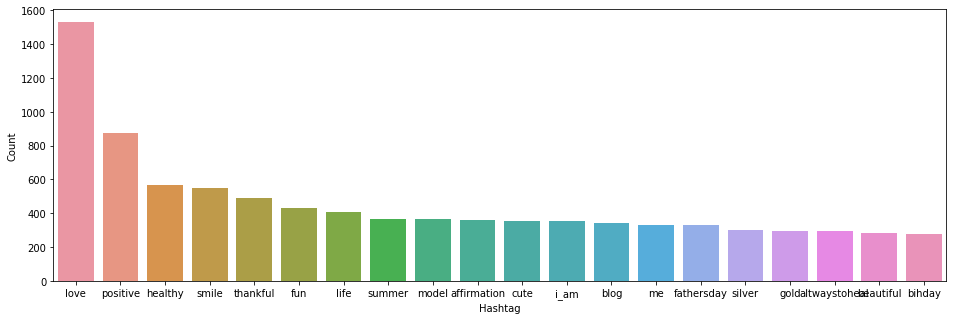

In [ ]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

#memilih 20 hastag yang paling dominan   
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [ ]:
#menandai kata-kata yang ada di set pelatihan
tokenized_tweet = train['tweet'].apply(lambda x: x.split()) 

# meng-import gensim
import gensim

#membuat model kata ke vektor
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, #mnentukan nomor yang diinginkan fitur/variabel 
            window=5, #ukuran konteksnya
            min_count=2,
            sg = 1, #1 for skip-gram model
            hs = 0,
            negative = 10, #untuk sampel kata negatif
            workers= 2, #jumlah intinya
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(train['tweet']), epochs=20)

(6110250, 8411580)

In [ ]:
#menampilkan kata-kata yang positif yaitu dinner
model_w2v.wv.most_similar(positive = "dinner")

[('spaghetti', 0.6434370279312134),
 ('#prosecco', 0.5985986590385437),
 ('sister!!', 0.5942443013191223),
 ('bay.', 0.5909408330917358),
 ('#pamper', 0.5876166224479675),
 ('7!', 0.5848385095596313),
 ('#trailrunning', 0.5811296701431274),
 ('podium', 0.580280065536499),
 ('3pm', 0.5796902775764465),
 ('cheers', 0.5731381177902222)]

In [ ]:
#menampilkan kata-kata yang positif yaitu cancer
model_w2v.wv.most_similar(positive = "cancer")

[('champion,', 0.7351163625717163),
 ('inflict', 0.7262750267982483),
 ('acknowledge', 0.7194692492485046),
 ('level.', 0.7162280678749084),
 ('ways.', 0.7125439643859863),
 ('ownership', 0.7082306742668152),
 ('roughly', 0.7065136432647705),
 ('&amp;selfish', 0.703624963760376),
 ('oâ\x80¦', 0.7020218372344971),
 ('harassment', 0.7015588283538818)]

In [ ]:
#menampilkan kata-kata yang positif yaitu apple
model_w2v.wv.most_similar(positive = "apple")

[('"mytraining"', 0.7400689125061035),
 ('mytraining', 0.7364315986633301),
 ('training"', 0.7135757207870483),
 ('app,', 0.6799724698066711),
 ('app', 0.6371762156486511),
 ('"my', 0.635164737701416),
 ('mp3', 0.6104458570480347),
 ('ta', 0.6069680452346802),
 ("domino's", 0.6013269424438477),
 ('heroku', 0.6010076999664307)]

In [ ]:
#menampilkan kata-kata yang negative yaitu hate
model_w2v.wv.most_similar(negative = "hate")

[('#apple', -0.021121520549058914),
 ('#yay', -0.04509635269641876),
 ('currently', -0.045613911002874374),
 ('#wednesdaywisdom', -0.04802060127258301),
 ('#games', -0.05024472996592522),
 ('members', -0.05138364061713219),
 ('now.', -0.058691173791885376),
 ('â\x80¦', -0.06250926852226257),
 ('#miami', -0.070481076836586),
 ('#grateful', -0.07358583807945251)]

In [ ]:
from tqdm import tqdm #untuk membuat Pengukur Kemajuan
tqdm.pandas(desc="progress-bar")
from gensim.models.doc2vec import LabeledSentence

In [ ]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(LabeledSentence(s, ["tweet_" + str(i)]))
    return output

#memberi label pada semua tweet
labeled_tweets = add_label(tokenized_tweet)

labeled_tweets[:6]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `LabeledSentence` (Class will be removed in 4.0.0, use TaggedDocument instead).
  after removing the cwd from sys.path.


[LabeledSentence(words=['@user', 'when', 'a', 'father', 'is', 'dysfunctional', 'and', 'is', 'so', 'selfish', 'he', 'drags', 'his', 'kids', 'into', 'his', 'dysfunction.', '#run'], tags=['tweet_0']),
 LabeledSentence(words=['@user', '@user', 'thanks', 'for', '#lyft', 'credit', 'i', "can't", 'use', 'cause', 'they', "don't", 'offer', 'wheelchair', 'vans', 'in', 'pdx.', '#disapointed', '#getthanked'], tags=['tweet_1']),
 LabeledSentence(words=['bihday', 'your', 'majesty'], tags=['tweet_2']),
 LabeledSentence(words=['#model', 'i', 'love', 'u', 'take', 'with', 'u', 'all', 'the', 'time', 'in', 'urð\x9f\x93±!!!', 'ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91', 'ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦'], tags=['tweet_3']),
 LabeledSentence(words=['factsguide:', 'society', 'now', '#motivation'], tags=['tweet_4']),
 LabeledSentence(words=['[2/2]', 'huge', 'fan', 'fare', 'and', 'big', 'talking', 'before', 'they', 'leave.', 'chaos', 'and', 'pay', 'disputes', 'when', 'they', 'get', 'there.', '#allshowandn

In [ ]:
#untuk menghapus pola yang tidak diinginkan dari data

import re
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
train_corpus = []

for i in range(0, 31962):
  review = re.sub('[^a-zA-Z]', ' ', train['tweet'][i])
  review = review.lower()
  review = review.split()
  
  ps = PorterStemmer()
  
  #untuk steaming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  #untuk joining them back with space
  review = ' '.join(review)
  train_corpus.append(review)

In [ ]:
test_corpus = []

for i in range(0, 17197):
  review = re.sub('[^a-zA-Z]', ' ', test['tweet'][i])
  review = review.lower()
  review = review.split()
  
  ps = PorterStemmer()
  
  #untuk stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  #untuk joining them back with space
  review = ' '.join(review)
  test_corpus.append(review)

In [ ]:
#membuat kata-kata

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x = cv.fit_transform(train_corpus).toarray()
y = train.iloc[:, 1]

print(x.shape)
print(y.shape)

(31962, 2500)
(31962,)


In [ ]:
#membuat kata-kata

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x_test = cv.fit_transform(test_corpus).toarray()

print(x_test.shape)

(17197, 2500)


In [ ]:
#untuk membedakan data training dan data test dan data yang valid

from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.25, random_state = 42)

print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(23971, 2500)
(7991, 2500)
(23971,)
(7991,)


In [ ]:
#untuk standarisasi prosesing
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)
x_test = sc.transform(x_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier #mengimport random forest
from sklearn.metrics import confusion_matrix #mengimport confusiin matrix
from sklearn.metrics import f1_score #mengimport akor f1

model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)

y_pred_rf = model_rf.predict(x_valid)
y_pred_train_rf = model_rf.predict(x_train)

print("Training Accuracy :", model_rf.score(x_train, y_train))
print("Validation Accuracy :", model_rf.score(x_valid, y_valid))

#menghitung skor f1 untuk set validasi
print("F1 score :", f1_score(y_valid, y_pred_rf))

#sebagai confusion matrix
cm = confusion_matrix(y_valid, y_pred_rf)
print(cm)

Training Accuracy : 0.999123941429227
Validation Accuracy : 0.9524465023151045
F1 score : 0.6130346232179226
[[7310  122]
 [ 258  301]]


In [ ]:
from sklearn.linear_model import LogisticRegression #mengimport logistic regression

model_lr = LogisticRegression()
model_lr.fit(x_train, y_train)

y_pred_lr = model_lr.predict(x_valid)
y_pred_train_lr = model_lr.predict(x_train)

print("Training Accuracy :", model_lr.score(x_train, y_train))
print("Validation Accuracy :", model_lr.score(x_valid, y_valid))

#menghitung skor f1 untuk set validasi
print("f1 score :", f1_score(y_valid, y_pred_lr))

#sebagai confusion matrix
cm = confusion_matrix(y_valid, y_pred_lr)
print(cm)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Training Accuracy : 0.9851487213716574
Validation Accuracy : 0.9416843949443123
f1 score : 0.5933682373472949
[[7185  247]
 [ 219  340]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier #mengimport decision tree

model_dtc = DecisionTreeClassifier()
model_dtc.fit(x_train, y_train)

y_pred_dtc = model_dtc.predict(x_valid)
y_pred_train_dtc = model_dtc.predict(x_train)

print("Training Accuracy :", model_dtc.score(x_train, y_train))
print("Validation Accuracy :", model_dtc.score(x_valid, y_valid))

#menghitung skor f1 untuk set validasi
print("f1 score :", f1_score(y_valid, y_pred_dtc))

#sebagai confusion matrix
cm = confusion_matrix(y_valid, y_pred_dtc)
print(cm)

Training Accuracy : 0.9991656585040257
Validation Accuracy : 0.9319234138405706
f1 score : 0.5366269165247018
[[7132  300]
 [ 244  315]]


In [ ]:
from sklearn.svm import SVC #mengimport SVC

model_svc = SVC()
model_svc.fit(x_train, y_train)

y_pred_svc = model_svc.predict(x_valid)
y_pred_train_svc = model_svc.predict(x_train)

print("Training Accuracy :", model_svc.score(x_train, y_train))
print("Validation Accuracy :", model_svc.score(x_valid, y_valid))

#menghitung skor f1 untuk set validasi
print("f1 score :", f1_score(y_valid, y_pred_svc))

#sebagai confusion matrix
cm = confusion_matrix(y_valid, y_pred_svc)
print(cm)

Training Accuracy : 0.978181969880272
Validation Accuracy : 0.9521962207483419
f1 score : 0.4986876640419947
[[7419   13]
 [ 369  190]]


In [ ]:
from xgboost import XGBClassifier #mengimprt XGBC Klasifikasi

model_xgb = XGBClassifier()
model_xgb.fit(x_train, y_train)

y_pred_xgb = model_xgb.predict(x_valid)
y_pred_train_xgb = model_xgb.predict(x_train)

print("Training Accuracy :", model_xgb.score(x_train, y_train))
print("Validation Accuracy :", model_xgb.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred_xgb))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred_xgb)
print(cm)

Training Accuracy : 0.9445997246673064
Validation Accuracy : 0.9433112251282693
f1 score : 0.35378031383737524
[[7414   18]
 [ 435  124]]


In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score #mengimport skore akurasi dan skor random forest

def akurasi(y_true, y_pred):
  train_accuracy = accuracy_score(y_true, y_pred)
  train_roc_accuracy = roc_auc_score(y_true, y_pred)
  test_accuracy = accuracy_score(y_true, y_pred)
  test_roc_accuracy = roc_auc_score(y_true, y_pred)
  print('train accuracy score =', train_accuracy)
  print('train roc accuracy score =', train_roc_accuracy)
  print('test accuracy score =', test_accuracy)
  print('test roc accuracy score =', test_roc_accuracy)
  return train_accuracy, test_accuracy, train_roc_accuracy, test_roc_accuracy

In [ ]:
rf_train_accuracy, rf_train_roc_accuracy, rf_test_accuracy, rf_test_roc_accuracy = akurasi(y_valid, y_pred_rf)
lr_train_accuracy, lr_train_roc_accuracy, lr_test_accuracy, lr_test_roc_accuracy = akurasi(y_valid, y_pred_lr)
dtc_train_accuracy, dtc_train_roc_accuracy, dtc_test_accuracy, dtc_test_roc_accuracy = akurasi(y_valid, y_pred_dtc)
svc_train_accuracy, svc_train_roc_accuracy, svc_test_accuracy, svc_test_roc_accuracy = akurasi(y_valid, y_pred_svc)
xgb_train_accuracy, xgb_train_roc_accuracy, xgb_test_accuracy, xgb_test_roc_accuracy = akurasi(y_valid, y_pred_xgb)

train accuracy score = 0.9524465023151045
train roc accuracy score = 0.7610230189616626
test accuracy score = 0.9524465023151045
test roc accuracy score = 0.7610230189616626
train accuracy score = 0.9416843949443123
train roc accuracy score = 0.7874971596981385
test accuracy score = 0.9416843949443123
test roc accuracy score = 0.7874971596981385
train accuracy score = 0.9319234138405706
train roc accuracy score = 0.7615701381253238
test accuracy score = 0.9319234138405706
test roc accuracy score = 0.7615701381253238
train accuracy score = 0.9521962207483419
train roc accuracy score = 0.6690717363968798
test accuracy score = 0.9521962207483419
test roc accuracy score = 0.6690717363968798
train accuracy score = 0.9433112251282693
train roc accuracy score = 0.6097013639225821
test accuracy score = 0.9433112251282693
test roc accuracy score = 0.6097013639225821


In [ ]:
#menghasilkan perbandingan dari data algoritma random forest, logistik regression, Decision Tree Classifier, SVC, dan XGB Classifier
hasil = [('Random Forest Classifier', rf_train_accuracy,  rf_train_roc_accuracy, rf_test_accuracy, rf_test_roc_accuracy),
         ('Logistic Regression', lr_train_accuracy, lr_train_roc_accuracy, lr_test_accuracy, lr_test_roc_accuracy),
         ('Decision Tree Classifier', dtc_train_accuracy, dtc_train_roc_accuracy, dtc_test_accuracy, dtc_test_roc_accuracy),
         ('SVC', svc_train_accuracy, svc_train_roc_accuracy, svc_test_accuracy, svc_test_roc_accuracy),
         ('XGB Classifier', xgb_train_accuracy, xgb_train_roc_accuracy, xgb_test_accuracy, xgb_test_roc_accuracy)]


score = pd.DataFrame(data = hasil, columns = ['Model Name', 'Train Accuracy', 'Train ROC Accuracy', 'Test Accuracy', 'Test ROC Accuracy'])
score.set_index('Model Name', inplace = True)

score

#Hasil dari perbandingan antara data algoritma random forest, logistik regression, Decision Tree Classifier, SVC, dan XGB Classifier.
#dari segi rata-rata semua data akurasi yang paling unggul adalah algoritma random forest

,Train Accuracy,Train ROC Accuracy,Test Accuracy,Test ROC Accuracy
Model Name,,,,
Random Forest Classifier,0.952447,0.952447,0.761023,0.761023
Logistic Regression,0.941684,0.941684,0.787497,0.787497
Decision Tree Classifier,0.931923,0.931923,0.761570,0.761570
SVC,0.952196,0.952196,0.669072,0.669072
XGB Classifier,0.943311,0.943311,0.609701,0.609701
